In [1]:
%load_ext autoreload
%matplotlib inline

%autoreload 2

# %load_ext watermark
# %watermark -v -n -m -p numpy,scipy,sklearn,pandas,tensorflow,keras



In [112]:
from data.preprocess import PreProcessor

data = PreProcessor(config=PreProcessor.DEFAULT_CONFIG,
                    data_dir='data/raw/r252-corpus-features/org/elasticsearch/action/admin/cluster/')
# data = PreProcessor(config=PreProcessor.DEFAULT_CONFIG,
#                     data_dir='data/raw/r252-corpus-features/org/elasticsearch/')

vocab = data.metadata['token_vocab']
processed = data.get_tensorise_data()


In [122]:
import numpy as np
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.python.keras import layers

from models.cnn_attention import ConvAttention
from utils.activations import masked_sparse_cross_entropy_loss

vocabulary_size = len(vocab) + 1
max_chunk_length = data.config['max_chunk_length']
# code_snippet = processed['body_tokens']
code_snippet = np.expand_dims(processed['body_tokens'], -1)
label_name = np.expand_dims(processed['name_tokens'], axis=-1)
# label_name = processed['name_tokens']
# label_name = keras.utils.to_categorical(processed['name_tokens'], num_classes=vocabulary_size)
print("Vocab Size: {} number of Code snippet: {} number of labels: {}".format(vocabulary_size, len(code_snippet),
                                                                              len(label_name)))
print("Label_name shape: {}\nCode_snippet shape: {}".format(label_name.shape, code_snippet.shape))

# TODO make the input a json file and parse it
hyperparameter = {'batch_size': 1, 'k1': 8, 'k2': 8, 'w1': 24, 'w2': 29, 'w3': 10, 'dropout_rate': 0.5,
                  'max_chunk_length': max_chunk_length, 'vocabulary_size': vocabulary_size, 'embedding_dim': 128}
# Optimised hyperparameter are reported in page 5 of the paper

batch_size = hyperparameter['batch_size']
# define layers
main_input = layers.Input(shape=(max_chunk_length, 1),
                          batch_size=batch_size,
                          dtype=tf.int32, name='main_input',
                          )

cnn_layer = ConvAttention(hyperparameter)

optimizer = keras.optimizers.Nadam()  # RMSprop with Nesterov momentum
# loss_func = masked_sparse_cross_entropy_loss
loss_func = keras.losses.sparse_categorical_crossentropy

# define execution
cnn_output = cnn_layer(main_input)
model = keras.Model(inputs=[main_input], outputs=cnn_output)
model.compile(optimizer=optimizer,
              loss=loss_func,
              metrics=['accuracy'],
              )
# fit the model
# tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True,
#                                          batch_size=batch_size)
history = model.fit(code_snippet,
                    label_name,
                    epochs=50,
                    verbose=2,
                    batch_size=batch_size,
                    # callbacks=[tbCallBack],
                    validation_split=0.2)


Vocab Size: 629 number of Code snippet: 224 number of labels: 224
Label_name shape: (224, 50, 1)
Code_snippet shape: (224, 50, 1)
ConvAttention: mask_vector shape = (1, 50, 1)
ConvAttention: Tokens shape = (1, 50, 1, 128)


ConvAttention: h_t shape = (1, 50, 8)
AttentionFeatures: C shape = (1, 50, 1, 128), h_t shape = (1, 50, 8)
AttentionFeatures: L_1 shape = (1, 50, 1, 8)
AttentionFeatures: L_2 shape = (1, 50, 1, 8)
AttentionFeatures: L_2 shape  after multiply = (1, 50, 50, 8)
AttentionFeatures: L_feat shape = (1, 50, 50, 8)
ConvAttention: L_feat shape = (1, 50, 50, 8)
AttentionWeights: l_feat shape = (1, 50, 50, 8)
AttentionWeights: attention_weight shape = (1, 50, 50, 1)
ConvAttention: alpha shape = (1, 50, 50)
ConvAttention: n_hat shape = (1, 50, 128)


ConvAttention: n shape = (1, 50, 629)
Train on 179 samples, validate on 45 samples


Epoch 1/50


 - 7s - loss: 4.5361 - acc: 0.4337 - val_loss: 1.8123 - val_acc: 0.9009


Epoch 2/50


 - 4s - loss: 1.1244 - acc: 0.8944 - val_loss: 0.9904 - val_acc: 0.8636


Epoch 3/50


 - 4s - loss: 0.7090 - acc: 0.8946 - val_loss: 0.8174 - val_acc: 0.8631


Epoch 4/50


 - 4s - loss: 0.5841 - acc: 0.8947 - val_loss: 0.7498 - val_acc: 0.8631


Epoch 5/50


 - 4s - loss: 0.5357 - acc: 0.8949 - val_loss: 0.7225 - val_acc: 0.8627


Epoch 6/50


 - 4s - loss: 0.5116 - acc: 0.8947 - val_loss: 0.7054 - val_acc: 0.8622


Epoch 7/50


 - 4s - loss: 0.4977 - acc: 0.8952 - val_loss: 0.6872 - val_acc: 0.8622


Epoch 8/50


 - 4s - loss: 0.4827 - acc: 0.8950 - val_loss: 0.6824 - val_acc: 0.8627


Epoch 9/50


 - 4s - loss: 0.4721 - acc: 0.8955 - val_loss: 0.6746 - val_acc: 0.8631


Epoch 10/50


 - 4s - loss: 0.4628 - acc: 0.8951 - val_loss: 0.6721 - val_acc: 0.8644


Epoch 11/50


 - 4s - loss: 0.4565 - acc: 0.8951 - val_loss: 0.6664 - val_acc: 0.8609


Epoch 12/50


 - 4s - loss: 0.4505 - acc: 0.8942 - val_loss: 0.6645 - val_acc: 0.8604


Epoch 13/50


 - 4s - loss: 0.4456 - acc: 0.8941 - val_loss: 0.6649 - val_acc: 0.8587


Epoch 14/50


 - 4s - loss: 0.4412 - acc: 0.8943 - val_loss: 0.6611 - val_acc: 0.8591


Epoch 15/50


 - 4s - loss: 0.4366 - acc: 0.8944 - val_loss: 0.6607 - val_acc: 0.8591


Epoch 16/50


 - 4s - loss: 0.4345 - acc: 0.8949 - val_loss: 0.6594 - val_acc: 0.8600


Epoch 17/50


 - 4s - loss: 0.4309 - acc: 0.8966 - val_loss: 0.6600 - val_acc: 0.8591


Epoch 18/50


 - 4s - loss: 0.4279 - acc: 0.8971 - val_loss: 0.6610 - val_acc: 0.8649


Epoch 19/50


 - 4s - loss: 0.4256 - acc: 0.9037 - val_loss: 0.6613 - val_acc: 0.8649


Epoch 20/50


 - 4s - loss: 0.4232 - acc: 0.9066 - val_loss: 0.6660 - val_acc: 0.8764


Epoch 21/50


 - 4s - loss: 0.4217 - acc: 0.9088 - val_loss: 0.6719 - val_acc: 0.8756


Epoch 22/50


 - 4s - loss: 0.4191 - acc: 0.9102 - val_loss: 0.6699 - val_acc: 0.8720


Epoch 23/50


 - 4s - loss: 0.4167 - acc: 0.9116 - val_loss: 0.6765 - val_acc: 0.8733


Epoch 24/50


 - 4s - loss: 0.4146 - acc: 0.9115 - val_loss: 0.6705 - val_acc: 0.8760


Epoch 25/50


 - 4s - loss: 0.4131 - acc: 0.9122 - val_loss: 0.6692 - val_acc: 0.8760


Epoch 26/50


 - 4s - loss: 0.4126 - acc: 0.9128 - val_loss: 0.6721 - val_acc: 0.8778


Epoch 27/50


 - 4s - loss: 0.4091 - acc: 0.9135 - val_loss: 0.6738 - val_acc: 0.8738


Epoch 28/50


 - 4s - loss: 0.4068 - acc: 0.9144 - val_loss: 0.6808 - val_acc: 0.8742


Epoch 29/50


 - 4s - loss: 0.4054 - acc: 0.9147 - val_loss: 0.6826 - val_acc: 0.8689


Epoch 30/50


 - 4s - loss: 0.4042 - acc: 0.9152 - val_loss: 0.6830 - val_acc: 0.8773


Epoch 31/50


 - 4s - loss: 0.4004 - acc: 0.9153 - val_loss: 0.6860 - val_acc: 0.8769


Epoch 32/50


 - 4s - loss: 0.3988 - acc: 0.9170 - val_loss: 0.6915 - val_acc: 0.8756


Epoch 33/50


 - 4s - loss: 0.3967 - acc: 0.9168 - val_loss: 0.6961 - val_acc: 0.8733


Epoch 34/50


 - 4s - loss: 0.3952 - acc: 0.9175 - val_loss: 0.6969 - val_acc: 0.8729


Epoch 35/50


 - 4s - loss: 0.3918 - acc: 0.9199 - val_loss: 0.7047 - val_acc: 0.8738


Epoch 36/50


 - 4s - loss: 0.3892 - acc: 0.9198 - val_loss: 0.7105 - val_acc: 0.8716


Epoch 37/50


 - 4s - loss: 0.3848 - acc: 0.9207 - val_loss: 0.7234 - val_acc: 0.8698


Epoch 38/50


 - 4s - loss: 0.3805 - acc: 0.9196 - val_loss: 0.7285 - val_acc: 0.8698


Epoch 39/50


 - 4s - loss: 0.3766 - acc: 0.9201 - val_loss: 0.7347 - val_acc: 0.8698


Epoch 40/50


 - 4s - loss: 0.3700 - acc: 0.9215 - val_loss: 0.7248 - val_acc: 0.8698


Epoch 41/50


 - 4s - loss: 0.3633 - acc: 0.9234 - val_loss: 0.7121 - val_acc: 0.8773


Epoch 42/50


 - 4s - loss: 0.3532 - acc: 0.9219 - val_loss: 0.7087 - val_acc: 0.8764


Epoch 43/50


 - 4s - loss: 0.3450 - acc: 0.9236 - val_loss: 0.7029 - val_acc: 0.8791


Epoch 44/50


 - 4s - loss: 0.3405 - acc: 0.9226 - val_loss: 0.7052 - val_acc: 0.8796


Epoch 45/50


 - 4s - loss: 0.3372 - acc: 0.9240 - val_loss: 0.7056 - val_acc: 0.8796


Epoch 46/50


 - 4s - loss: 0.3350 - acc: 0.9238 - val_loss: 0.7010 - val_acc: 0.8813


Epoch 47/50


 - 4s - loss: 0.3352 - acc: 0.9234 - val_loss: 0.7104 - val_acc: 0.8831


Epoch 48/50


 - 4s - loss: 0.3326 - acc: 0.9248 - val_loss: 0.7094 - val_acc: 0.8827


Epoch 49/50


 - 4s - loss: 0.3315 - acc: 0.9253 - val_loss: 0.7166 - val_acc: 0.8791


Epoch 50/50


 - 4s - loss: 0.3293 - acc: 0.9241 - val_loss: 0.7196 - val_acc: 0.8742


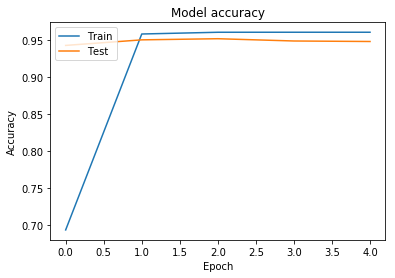

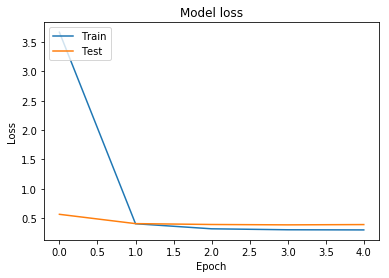

In [150]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [151]:
# # overfit and evaluate the model 
loss, accuracy = model.evaluate(code_snippet, label_name, batch_size=1, verbose=0)
print('Accuracy: {}'.format(accuracy * 100))


Accuracy: 95.76640725135803


In [127]:
# tf.keras.models.save_model(
#     model,
#     'test',
#     overwrite=True,
#     include_optimizer=True
# )
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")


Saved model to disk


In [169]:
# translate prediction

from data.utils import translate_tokenized_array_to_list_words, predict_name

# prediction = model.predict(np.expand_dims(code_snippet[8], 0), steps=1)
prediction = model.predict(code_snippet[9:10], steps=1)
print(prediction.argmax(2))
# translate_tokenized_array_to_list_words(vocab, [10])
# predict_name(vocab, model, code_snippet[21].reshape(1, -1))
# translate_tokenized_array_to_list_words(vocab, prediction.argmax(2)[0])
# print(prediction2.argmax(2))
# prediction.argmax(2)
# label_name.shape
# code_snippet.shape



[[ 9  9 10 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]]


In [170]:
tf.Session().run(keras.backend.nn.top_k(prediction, k=5, sorted=True, name=None).values)

array([[[9.74467158e-01, 8.00809916e-03, 1.91711180e-04, 1.77631344e-04,
         1.64253637e-04],
        [6.97512478e-02, 4.49461006e-02, 4.08384837e-02, 3.33750322e-02,
         3.09261326e-02],
        [8.10689628e-02, 4.16256934e-02, 3.06818392e-02, 3.05920336e-02,
         2.91933920e-02],
        [1.95744574e-01, 4.21518870e-02, 3.57662216e-02, 3.55531238e-02,
         3.33364345e-02],
        [4.17087853e-01, 3.73823285e-01, 2.66980622e-02, 2.51173712e-02,
         1.71793625e-02],
        [9.42873180e-01, 5.38596734e-02, 8.06619413e-04, 7.63124030e-04,
         3.98238626e-04],
        [9.99991417e-01, 8.63846526e-06, 8.79301354e-10, 8.46905546e-10,
         1.86203053e-10],
        [9.96307254e-01, 3.65777523e-03, 1.15419825e-05, 1.09807361e-05,
         4.37575682e-06],
        [9.83414114e-01, 1.61710586e-02, 1.19477285e-04, 1.13321381e-04,
         5.23261915e-05],
        [9.99028206e-01, 9.67959350e-04, 1.43433579e-06, 1.36828987e-06,
         4.78355673e-07],
        [9

In [171]:
tf.Session().run(keras.backend.nn.top_k(prediction, k=5, sorted=True, name=None).indices)

array([[[  9, 395, 330, 502, 501],
        [  9,  10,  15,  47,   8],
        [ 10,  15,  47,  13,   8],
        [ 10,   0,  13,  21,  46],
        [  0,  10,  21,  46,  31],
        [  0,  10,  21,  46,  31],
        [  0,  10,  21,  46,  31],
        [  0,  10,  21,  46,  31],
        [  0,  10,  21,  46,  31],
        [  0,  10,  21,  46,  31],
        [  0,  10,  21,  46,  31],
        [  0,  10,  21,  46,  31],
        [  0,  10,  21,  46,  31],
        [  0,  10,  21,  46,  31],
        [  0,  10,  21,  46,  31],
        [  0,  10,  21,  46,  31],
        [  0,  10,  21,  46,  31],
        [  0,  10,  21,  46,  31],
        [  0,  10,  21,  46,  31],
        [  0,  10,  21,  46,  31],
        [  0,  10,  21,  46,  31],
        [  0,  10,  21,  46,  31],
        [  0,  10,  21,  46,  31],
        [  0,  10,  21,  46,  31],
        [  0,  10,  21,  46,  31],
        [  0,  10,  21,  46,  31],
        [  0,  10,  21,  46,  31],
        [  0,  10,  21,  46,  31],
        [  0,  10,  

In [174]:
translate_tokenized_array_to_list_words(vocab, np.asarray([9, 15, 47, 13, 8, 10]))


['<s>', 'cluster', 'transport', 'node', 'get', '</s>']

In [172]:
translate_tokenized_array_to_list_words(vocab, label_name[9].reshape(1, -1)[0])


['<s>', 'get', 'snapshots', 'request', '</s>']